# Even Fibonacci Numbers


Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

$$1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...$$

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.


## Solution One - Generating All Fibonacci Numbers and Evaluating
The first solution that comes to mind is just generating all Fibonacci Numbers and then adding them up if they are even.

In [28]:
from typing import List

from utils.timing import timed

@timed(10)
def solution_one(upper_bound: int) -> int:
    """
    sums all the even numbers in a Fibonnaci sequence that are bellow the provided upper
    bound
    
    :param upper_bound: upper bound
    """
    fibo_numbers: List[int, ...] = [0, 1]
    total: int = 0
        
    while ((new := fibo_numbers[-1] + fibo_numbers[-2]) < upper_bound):
        fibo_numbers.append(new)
            
    for number in fibo_numbers:
        
        if not number % 2:
            total += number
    
    return total

answer, time_elapsed = solution_one(4000000)
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 4613732
That took: 7.050199928926304e-06


### Solution One Discussion
Apart from generating the numbers themselves (which we can't do much about), the biggest problem with the current solution is that it iterates over the list of Fibonacci numbers twice: firstly while generating them, secondly while adding them up.

## Solution Two - Generating All Fibonacci Numbers & Evaluating
A straightforward improvement we could do is evaluating the numbers and adding them up as they are generated. This process would also allow us to save space since we don't have to store all the Fibonacci numbers, just the last two.

In [29]:
from typing import List

from utils.timing import timed

@timed(10)
def solution_two(upper_bound: int) -> int:
    """
    sums all the even numbers in a Fibonnaci sequence that are bellow the provided upper
    bound
    
    :param upper_bound: upper bound
    """
    a, b = 1, 0
    total: int = 0
        
    while ((new := a + b) < upper_bound):
        a, b = b, new
        
        if not new % 2:
            total += new
            
    return total

answer, time_elapsed = solution_two(4000000)
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 4613732
That took: 2.688200038392097e-06


### Solution Two Discussion
While we optimized solution two, it still has a linear complexity due to how Fibonacci numbers are generated.

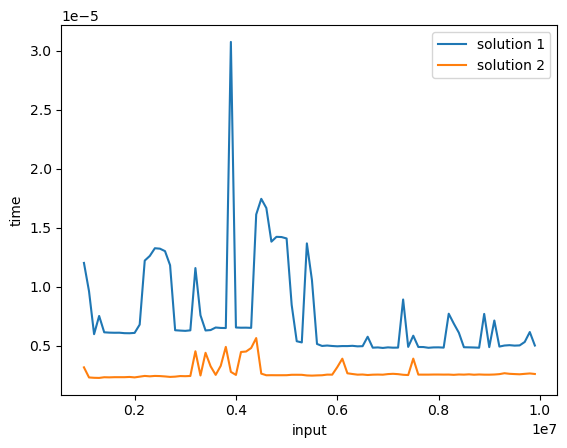

In [30]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(1000000, 10000000, 100000))
plot_range(params, (solution_one, solution_two))